In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [23]:
df = pd.read_csv("Ice_cream selling data.csv")

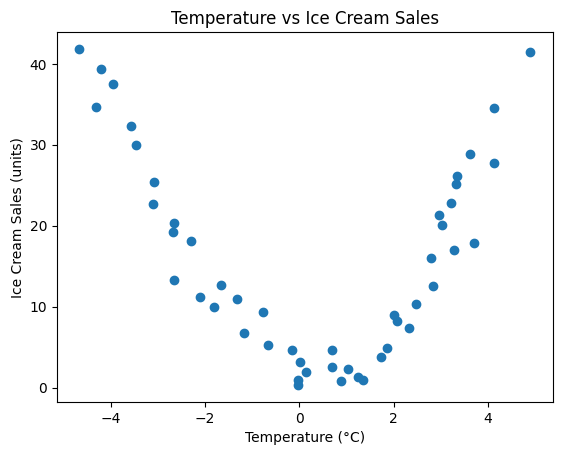

In [24]:
plt.scatter(df['Temperature (°C)'], df['Ice Cream Sales (units)'])
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.title("Temperature vs Ice Cream Sales")
plt.show()

In [25]:
x = df[['Temperature (°C)']]
y = df['Ice Cream Sales (units)']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)

In [27]:
degree = 2

poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [28]:
scaler = StandardScaler()

# Fit scaler on training data
x_train_scaled = scaler.fit_transform(x_train_poly)

# Transform test data
x_test_scaled = scaler.transform(x_test_poly)


In [29]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(x_test_scaled)

In [31]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R2 Score: 0.8430551371938839
MAE: 3.2299819836597288
MSE: 14.878796440981489
RMSE: 3.8573042971719884


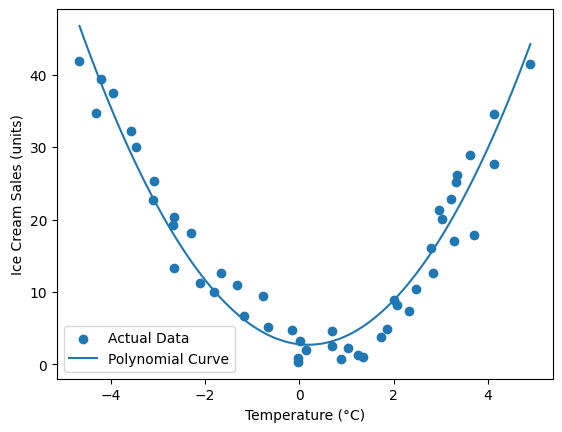

In [32]:
# Create smooth X values
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

# Transform using same steps
x_range_poly = poly.transform(x_range)
x_range_scaled = scaler.transform(x_range_poly)

# Predict curve
y_range_pred = model.predict(x_range_scaled)
# Plot
plt.scatter(x, y, label='Actual Data')
plt.plot(x_range, y_range_pred, label='Polynomial Curve')
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.show()
